In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.cifar10 import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [6]:
num_classes = 10

cifar10_classes = ["airplane","automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

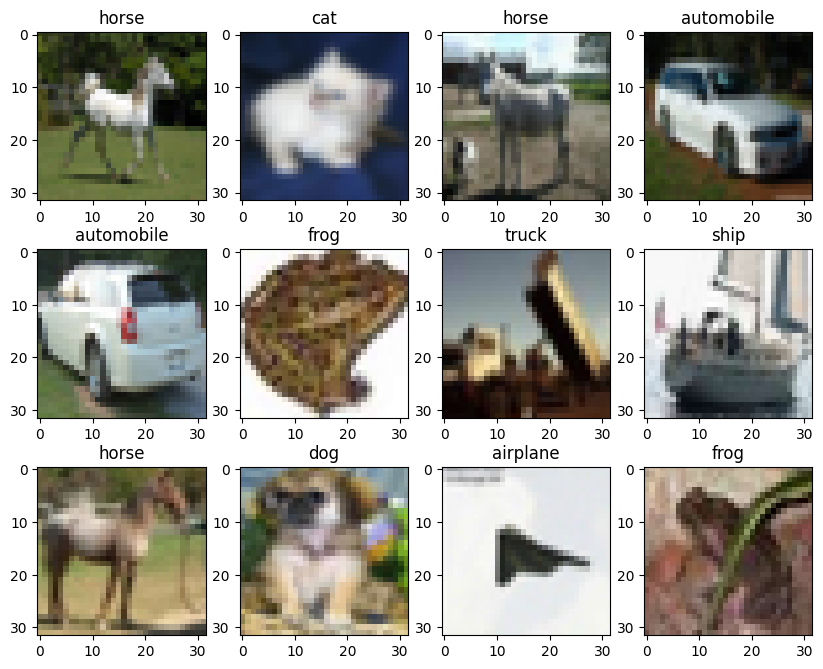

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Declaring the number of rows
rows = 3

# Declaring the number of columns
cols = 4

fig = plt.figure(figsize = (10, 8))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(y_train))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(x_train[random_index, :])

        ax.set_title(cifar10_classes[y_train[random_index, 0]])

# Display the plot
plt.show()

In [8]:
# Data Preperation
# normalize the data
# transform the target data - one hot representation

np.max(x_train),np.min(x_train)

(255, 0)

In [9]:
# normalize the data
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0

In [10]:
# one hot encoding of target

y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train_encoded[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
# Model Building
# Sending the data for CNN - 4 dim (batch_size,h,w,number of channels)
# 60000,32,32,3

In [14]:
model_0 = Sequential()
model_0.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 1)         28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model_0 = Sequential()
model_0.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu', input_shape=(32,32,3),padding="same"))
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 1)         28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model_0 = Sequential()
model_0.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3),padding="same"))
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# if we make of indices instead of one-hot encoding - loss function should be - sparse_categorical_crossentropy
# if we make of one hot representation - loss function should be categorical_crossentropy

In [18]:
#initialize a new model

model_1 = Sequential()

model_1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3),padding="same"))
model_1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding="same"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding="same"))
model_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding="same"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [19]:
example = x_train_normalized[0].reshape(1,32,32,3)

In [20]:
output = model_1.layers[0](example)

In [21]:
output.shape

TensorShape([1, 32, 32, 32])

In [22]:
one_sample = output[0,:,:,0]

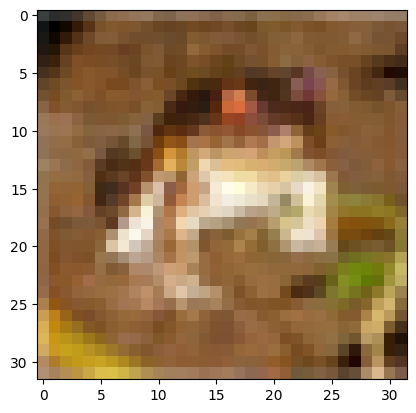

In [23]:
plt.imshow(x_train_normalized[0])

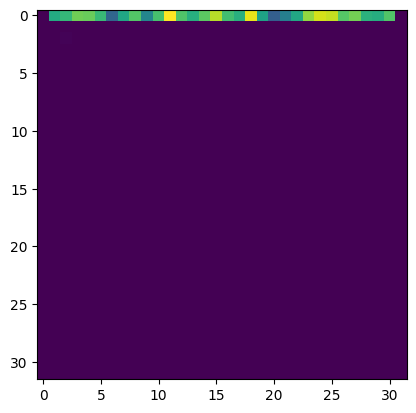

In [24]:
plt.imshow(one_sample)

In [25]:
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model_1.fit(x_train_normalized, y_train_encoded,
                      validation_data=(x_test_normalized, y_test_encoded),
                      batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 319s 202ms/step - loss: 1.3845 - accuracy: 0.4995 - val_loss: 1.0727 - val_accuracy: 0.6198
Epoch 2/10
1563/1563 [==============================] - 269s 172ms/step - loss: 0.9258 - accuracy: 0.6746 - val_loss: 0.8509 - val_accuracy: 0.7035
Epoch 3/10
1563/1563 [==============================] - 265s 170ms/step - loss: 0.7325 - accuracy: 0.7441 - val_loss: 0.7839 - val_accuracy: 0.7231
Epoch 4/10
1563/1563 [==============================] - 272s 174ms/step - loss: 0.6073 - accuracy: 0.7843 - val_loss: 0.7952 - val_accuracy: 0.7372
Epoch 5/10
1563/1563 [==============================] - 252s 161ms/step - loss: 0.5007 - accuracy: 0.8237 - val_loss: 0.7979 - val_accuracy: 0.7412
Epoch 6/10
1563/1563 [==============================] - 266s 170ms/step - loss: 0.4046 - accuracy: 0.8559 - val_loss: 0.8273 - val_accuracy: 0.7492
Epoch 7/10
1563/1563 [==============================] - 265s 169ms/step - loss: 0.3240 - accuracy: 0.8848 - val_

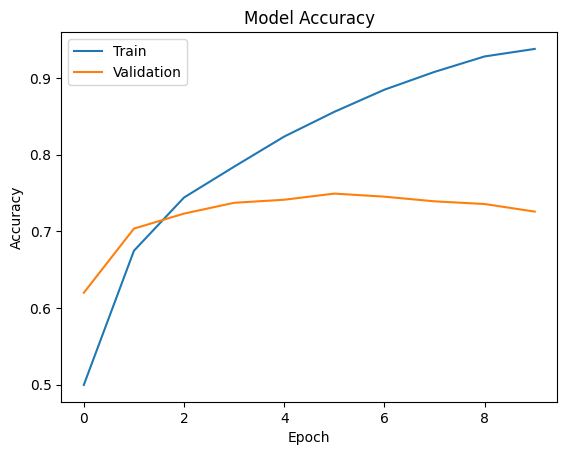

In [27]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [28]:
# Overfit
# Dropout - Reguralization

In [29]:
32*32*3*128

393216

In [30]:
9*32

288

In [31]:
from tensorflow.keras.layers import LeakyReLU
# Initialized a sequential model
model_2 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes the input dimension of CIFAR images
model_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 20% neurons to reduce overfitting
model_2.add(Dropout(0.2))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 20% neurons to reduce overfitting
model_2.add(Dropout(0.2))

# Adding max pooling to reduce the size of output of second convolutional layer
model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model_2.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% neurons to reduce overfitting
model_2.add(Dropout(rate=0.5))

# Adding the output layer with 10 neurons and 'softmax'  activation function since this is a multi-class classification problem
model_2.add(Dense(10, activation = 'softmax'))

In [32]:
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history_2 = model_2.fit(x_train_normalized, y_train_encoded,
                      validation_data=(x_test_normalized, y_test_encoded),
                      batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 155s 98ms/step - loss: 1.4697 - accuracy: 0.4710 - val_loss: 1.3684 - val_accuracy: 0.5381
Epoch 2/10
1563/1563 [==============================] - 155s 99ms/step - loss: 1.1262 - accuracy: 0.6018 - val_loss: 1.3413 - val_accuracy: 0.5630
Epoch 3/10
1563/1563 [==============================] - 157s 100ms/step - loss: 0.9822 - accuracy: 0.6548 - val_loss: 1.4701 - val_accuracy: 0.5730
Epoch 4/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.8851 - accuracy: 0.6867 - val_loss: 1.2280 - val_accuracy: 0.6294
Epoch 5/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.8111 - accuracy: 0.7130 - val_loss: 1.2711 - val_accuracy: 0.6364
Epoch 6/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.7476 - accuracy: 0.7336 - val_loss: 1.2539 - val_accuracy: 0.6346
Epoch 7/10
 533/1563 [=========>....................] - ETA: 1:36 - loss: 0.6783 - accuracy: 0.7591

KeyboardInterrupt: 

In [ ]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [ ]:
# Increase the layers

# Initialized a sequential model
model_3 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model_3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of output of the second convolutional layer
model_3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model_3.add(Dropout(0.25))

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of output of the fourth convolutional layer
model_3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model_3.add(Dropout(0.25))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model_3.add(Dense(256))

# Adding LeakyRelu activation function with negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% of dense layer neurons to reduce overfitting
model_3.add(Dropout(0.5))

# Adding the output layer with 10 neurons and 'softmax' activation function since this is a multi-class classification problem
model_3.add(Dense(10, activation = 'softmax'))

In [ ]:
model_3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(x_train_normalized, y_train_encoded,
                      validation_data=(x_test_normalized, y_test_encoded),
                      batch_size=32, epochs=10)

In [ ]:
plt.plot(history_3.history['accuracy'])

plt.plot(history_3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [ ]:
# Regulaization
# L1 Regularization
# L2 Regularization

# Initialized a sequential model
model_3 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model_3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of output of the second convolutional layer
model_3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model_3.add(Dropout(0.25))

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of output of the fourth convolutional layer
model_3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model_3.add(Dropout(0.25))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model_3.add(Dense(256, kernel_regularizer=tf.keras.regularizers.L2(0.01)))

# Adding LeakyRelu activation function with negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% of dense layer neurons to reduce overfitting
model_3.add(Dropout(0.5))

# Adding the output layer with 10 neurons and 'softmax' activation function since this is a multi-class classification problem
model_3.add(Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.L2(0.01)))

In [ ]:
from functools import partial

RegularizedDense = partial(Dense, kernel_regularizer=tf.keras.regularizers.L2(0.01))

In [ ]:
model = Sequential([
    RegularizedDense(256, input_shape=(32, 32, 3)),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    RegularizedDense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    RegularizedDense(10, activation='softmax')
])